# Sentiment Analysis

In [2]:
!pip install plotly

In [3]:
#install libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [4]:
#find duplicates
data_duplicates = pd.read_csv('apps.csv')
data_duplicates.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [68]:
#drop duplicates in category
app = data_duplicates.drop_duplicates()
print("Total numbers of category : ", app[ 'Category' ].count())
app.head()

Total numbers of category :  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [69]:
#remove and replace char
ch_remove = (',' , '+' , '$' , 'M' )
col_clean = ('Size','Installs','Price')
for col in col_clean:
    for char in ch_remove:
        app[col] = app[col].str.replace(char, '')
    app[col] = pd.to_numeric(app[col])


In [70]:
#visualisation of app rating
print("Avarage App rating = ", app['Rating'].mode())
data = [go.Histogram(
        x = app['Rating'],
        xbins = {'start': 1, 'size': 0.5, 'end' : 15}
)]
avg_rating = app['Rating'].mode()
# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_rating,
              'y0': 0,
              'x1': avg_rating,
              'y1': 3000,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({'data': data, 'layout': layout})


Avarage App rating =  0    4.3
Name: Rating, dtype: float64


In [34]:
n_categories = len(set(app['Category']))
print('Number of categories = ', n_categories)
n_apps_in_category = app['Category'].value_counts().sort_values(ascending=True)
data1 = go.Bar(
    x = n_apps_in_category.index,
    y= n_apps_in_category.values
)
fig = go.Figure(data1)
fig.show()

Number of categories =  33


,Category,App,Price


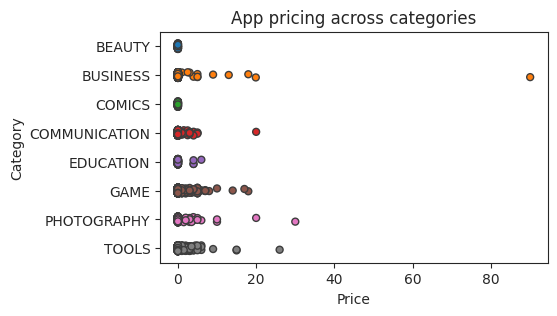

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(5,3)
popular_category = app[app.Category.isin(['PHOTOGRAPHY', 'BEAUTY', 'COMICS', 'TOOLS', 'COMMUNICATION', 'BUSINESS', 'EDUCATION', 'GAME'])]
ax = sns.stripplot(x='Price', y='Category', data = popular_category,  jitter=True, linewidth=1, hue='Category')
ax.set_title('App pricing across categories')
price_above_500 = popular_category[['Category', 'App', 'Price']][popular_category['Price'] > 500]
price_above_500

In [79]:
tr0 = go.Box(
    y=app['Installs'][app['Category'] == 'GAME'],
    name = 'EDUCATION',
)
tr1 = go.Box(
    y=app['Installs'][app['Category']=='EDUCATION'],
    name = 'COMICS',
)
layout = go.Layout(
    title = "EDUCATOIN VS COMICS",
    yaxis = dict(
        type = 'log',
        autorange = False
    )
)
data = [tr0, tr1]
plotly.offline.iplot({'data': data, 'layout': layout})

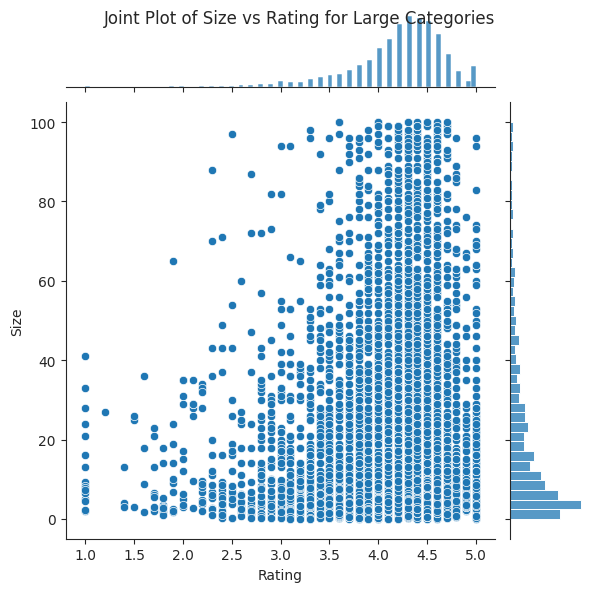

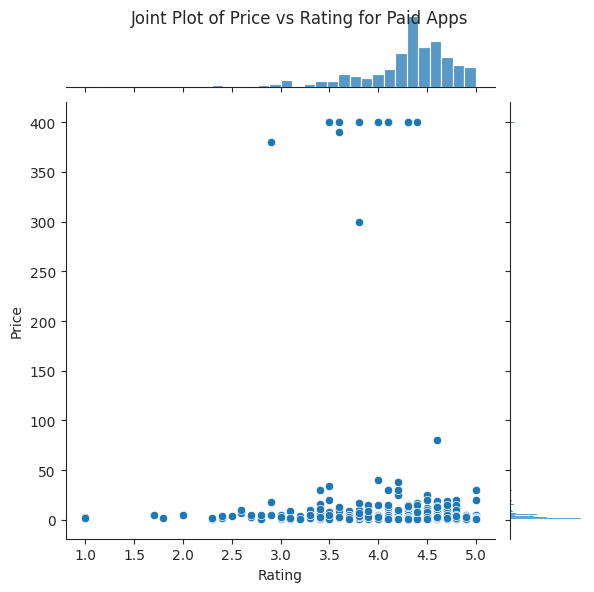

In [66]:
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
large_categories = app.groupby('Category').filter(lambda x: len(x) >= 100).reset_index()
paid_app = app[app['Type'] == 'Paid']
plt1 = sns.jointplot( x = 'Rating', y = 'Size', data = large_categories)
plt2 = sns.jointplot( x = 'Rating', y = 'Price', data = paid_app)
plt1.fig.suptitle('Joint Plot of Size vs Rating for Large Categories')
plt2.fig.suptitle('Joint Plot of Price vs Rating for Paid Apps')
plt.show()

In [71]:
# Load user_reviews csv and merge
reviews_df = pd.read_csv('user_reviews.csv')
merged_df = pd.merge(app, reviews_df, on='App', how = "inner")
# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])


Text(0.5, 1.0, 'Sentiment Subjectivity  Distribution')

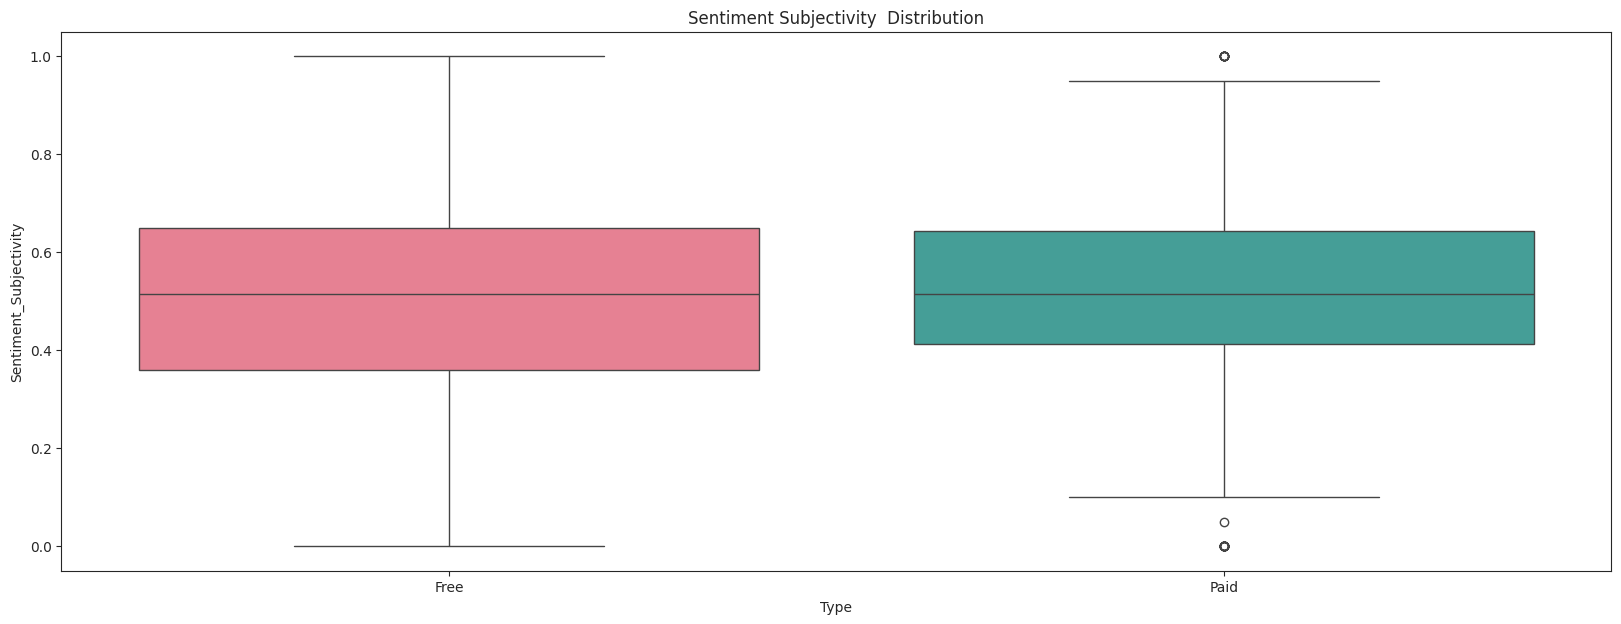

In [72]:
# User review setiment subjectvty for paid vs. free appssns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(20,7)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Subjectivity', palette="husl", data = merged_df)
ax.set_title('Sentiment Subjectivity  Distribution')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert Sentiment labels to numerical values
merged_df['Sentiment'] = merged_df['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(merged_df['Translated_Review'], merged_df['Sentiment'], test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predicting sentiments
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))